In [1]:
import time                             # sys time
import pickle                           # save result files
import numpy as np                      # numpy library for  matrix computations
import matplotlib.pyplot as plt         # plot
import seaborn as sns                   # nicer plots
from walk_simulation import walk_run    # wrapper for pybullet


In [2]:
def run_episode(stepLength,stepDuration):

    #In this part we will specify the steps position and duration and we will implement foot trajectory generation
    params = {
        "doubleSupportDuration" : 0.25,
        "stepDuration" : stepDuration,
        "pelvisHeight" : 0.7,
        "maximumFootHeight" : 0.07,
        "stepWidth" :0.12,
        "stepLength" : stepLength,
        "numberOfFootPrints" :17,
        "GUI" : False,
    }

    t = time.time()
    vel, pos, delta_time, CoT = walk_run(params)
    elapsed = time.time() - t
    print(str(elapsed) + " seconds to run simulation")
    
    average_speed = grade(pos,vel,delta_time)
    
    return vel, pos, delta_time, average_speed, CoT
    
    

In [3]:
def grade(pos,vel,delta_time):
    x_pos = pos[:,0]
    x_dist = x_pos[-1] - x_pos[0]
    average_velocity = x_dist / delta_time
    
    if pos[-1,2] < 0.5:
        average_velocity = 0
    
    return average_velocity

## Single simulation example

In [4]:
stepLength = 0.2
stepDuration = 1.2
vel, pos, delta_time, average_speed, CoT = run_episode(stepLength,stepDuration)
print("average speed = " + str(average_speed))
filename = "result_example.pickle"

result = {
    "stepDuration" : stepDuration,
    "stepLength" : stepLength,
    "average_speed" : average_speed,
    "CoT" : CoT,
}

with open(filename, 'wb') as handle:
    pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)


/Users/renard/Documents/etudes/EPFLMA3/Legged/project/legged_dcm_project/code/walk_simulation.py:205: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  current_mass = np.array([x for x in pybullet.getDynamicsInfo(bodyUniqueId=robotID, linkIndex=-1)])[0] # get base weight


Successfull sim !
7.199520111083984 seconds to run simulation
average speed = 0.15557731769763836


/Users/renard/Documents/etudes/EPFLMA3/Legged/project/legged_dcm_project/code/walk_simulation.py:222: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pos = np.array([*np.array(positions)[:,0]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [5]:
with open('result_example.pickle', 'rb') as handle:
    result_dump = pickle.load(handle)
    
print(result_dump)

{'stepDuration': 1.2, 'stepLength': 0.2, 'average_speed': 0.15557731769763836, 'CoT': 1.578164018625966}


In [18]:
stepLength = 0.2
stepDuration = 1.2

vel, pos, delta_time, original_speed, CoT = run_episode(stepLength,stepDuration)

print(average_speed)

/Users/renard/Documents/etudes/EPFLMA3/Legged/project/legged_dcm_project/code/walk_simulation.py:205: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  current_mass = np.array([x for x in pybullet.getDynamicsInfo(bodyUniqueId=robotID, linkIndex=-1)])[0] # get base weight


Successfull sim !
6.71821403503418 seconds to run simulation
0.39370128412232985


/Users/renard/Documents/etudes/EPFLMA3/Legged/project/legged_dcm_project/code/walk_simulation.py:222: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pos = np.array([*np.array(positions)[:,0]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [19]:
stepDuration =  0.8500000000000001
stepLength = 0.3750000000000001

vel, pos, delta_time, average_speed, CoT = run_episode(stepLength,stepDuration)

print("Speed = " + str(average_speed) )
print("Improvement = " + str(average_speed/original_speed) )

Successfull sim !
5.590893030166626 seconds to run simulation
Speed = 0.39370128412232985
Improvement = 2.5305827992707846


In [7]:

speedCoeff = 0.33334
stepDuration =  0.95000000000000001 #We select 1.2 second as step duration(step duration=SS+DS)
stepLength = stepDuration * speedCoeff #longitudinal distance between two sequential feet stepLength=stepStride/2, 

vel, pos, delta_time, average_speed = run_episode(stepLength,stepDuration)

print(average_speed)

Successfull sim !
5.842442989349365 seconds to run simulation
0.3055195540748949


0.800782300693114


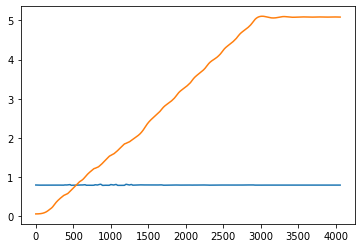

In [17]:
plt.plot(pos[:,2])
plt.plot(pos[:,0])

print(pos[-1,2])

## Grid Search

In [11]:
stepDurationSpace=np.arange(0.7,1.1,0.025)
stepLengthSpace=np.arange(0.25,0.5,0.0125)

sample_number = len(stepDurationSpace) * len(stepLengthSpace)
est_time = 6 * sample_number

print("sample number = " + str(sample_number))
print("estimated time = " + str(est_time/60) + " [min]")

sample number = 340
estimated time = 34.0 [min]


In [14]:
results = []

t0 = time.time()

for duration in stepDurationSpace:
    for length in stepLengthSpace:
        print("Length = "  + str(length) + " , Duration = " + str(duration) )
        vel, pos, delta_time, average_speed, CoT = run_episode(length,duration)
        result = {
            "stepDuration" : duration,
            "stepLength" : length,
            "average_speed" : average_speed,
            "CoT" : CoT,
        }
        results.append(result)

sim_time = time.time() - t0
print("Total search time : " + str(sim_time))

filename = "RESULTS_1.npy"
with open(filename, 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)


Length = 0.25 , Duration = 0.7


/Users/renard/Documents/etudes/EPFLMA3/Legged/project/legged_dcm_project/code/walk_simulation.py:205: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  current_mass = np.array([x for x in pybullet.getDynamicsInfo(bodyUniqueId=robotID, linkIndex=-1)])[0] # get base weight
/Users/renard/Documents/etudes/EPFLMA3/Legged/project/legged_dcm_project/code/walk_simulation.py:222: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pos = np.array([*np.array(positions)[:,0]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/npyio.py

Successfull sim !
5.072287082672119 seconds to run simulation
Length = 0.2625 , Duration = 0.7
Successfull sim !
5.045508146286011 seconds to run simulation
Length = 0.275 , Duration = 0.7
Successfull sim !
4.848974227905273 seconds to run simulation
Length = 0.28750000000000003 , Duration = 0.7
Successfull sim !
4.945901155471802 seconds to run simulation
Length = 0.30000000000000004 , Duration = 0.7
Successfull sim !
5.1076319217681885 seconds to run simulation
Length = 0.31250000000000006 , Duration = 0.7
Successfull sim !
4.896313905715942 seconds to run simulation
Length = 0.32500000000000007 , Duration = 0.7
Successfull sim !
4.841197729110718 seconds to run simulation
Length = 0.3375000000000001 , Duration = 0.7
Successfull sim !
4.926053285598755 seconds to run simulation
Length = 0.3500000000000001 , Duration = 0.7
Successfull sim !
5.060365915298462 seconds to run simulation
Length = 0.3625000000000001 , Duration = 0.7
Successfull sim !
4.891744136810303 seconds to run simula

Lenght - Duration Space plot : 


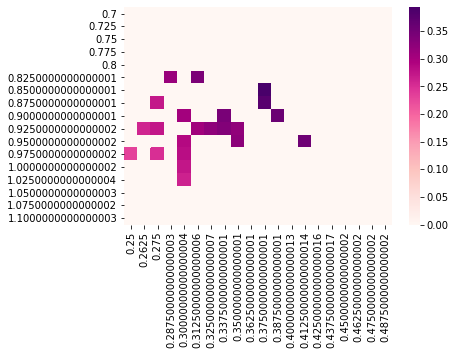

Optimal duration : 0.8500000000000001
Optimal length : 0.3750000000000001
Optimal speed : 0.39370128412232985


In [15]:
filename = "RESULTS_1.npy"

with open(filename, 'rb') as handle:
    result_dump = pickle.load(handle)

out = np.zeros((len(stepDurationSpace),len(stepLengthSpace)))
for d in range(len(stepDurationSpace)):
    for l in range(len(stepLengthSpace)):
        i = l + d * len(stepLengthSpace)
        out[d,l] = results[i]['average_speed']

ax = sns.heatmap(out, cmap="RdPu", yticklabels=stepDurationSpace, xticklabels=stepLengthSpace)


print("Lenght - Duration Space plot : ")
plt.show()

max_s = 0
for r in results:
    if r['average_speed'] > max_s:
        max_s = r['average_speed']
        opt_length = r['stepLength']
        opt_duration = r['stepDuration']
        
print("Optimal duration : " + str(opt_duration))
print("Optimal length : " + str(opt_length))
print("Optimal speed : " + str(max_s))


In [124]:
results

[{'stepDuration': 0.7,
  'stepLength': 0.05,
  'average_speed': 0.03926014868842841},
 {'stepDuration': 0.7,
  'stepLength': 0.07500000000000001,
  'average_speed': 0.05881929828671051},
 {'stepDuration': 0.7,
  'stepLength': 0.10000000000000002,
  'average_speed': 0.07789943236165678},
 {'stepDuration': 0.7,
  'stepLength': 0.12500000000000003,
  'average_speed': 0.0972212438508179},
 {'stepDuration': 0.7, 'stepLength': 0.15000000000000002, 'average_speed': 0},
 {'stepDuration': 0.7,
  'stepLength': 0.17500000000000004,
  'average_speed': 0.1363159458439101},
 {'stepDuration': 0.7,
  'stepLength': 0.20000000000000007,
  'average_speed': 0.1558950715927524},
 {'stepDuration': 0.7, 'stepLength': 0.22500000000000003, 'average_speed': 0},
 {'stepDuration': 0.7, 'stepLength': 0.25000000000000006, 'average_speed': 0},
 {'stepDuration': 0.7, 'stepLength': 0.2750000000000001, 'average_speed': 0},
 {'stepDuration': 0.7, 'stepLength': 0.3000000000000001, 'average_speed': 0},
 {'stepDuration': 0

In [121]:
results

[{'stepDuration': 0.7,
  'stepLength': 0.05,
  'average_speed': 0.03926014868842841},
 {'stepDuration': 0.7,
  'stepLength': 0.07500000000000001,
  'average_speed': 0.05881929828671051},
 {'stepDuration': 0.7,
  'stepLength': 0.10000000000000002,
  'average_speed': 0.07789943236165678},
 {'stepDuration': 0.7,
  'stepLength': 0.12500000000000003,
  'average_speed': 0.0972212438508179},
 {'stepDuration': 0.7, 'stepLength': 0.15000000000000002, 'average_speed': 0},
 {'stepDuration': 0.7,
  'stepLength': 0.17500000000000004,
  'average_speed': 0.1363159458439101},
 {'stepDuration': 0.7,
  'stepLength': 0.20000000000000007,
  'average_speed': 0.1558950715927524},
 {'stepDuration': 0.7, 'stepLength': 0.22500000000000003, 'average_speed': 0},
 {'stepDuration': 0.7, 'stepLength': 0.25000000000000006, 'average_speed': 0},
 {'stepDuration': 0.7, 'stepLength': 0.2750000000000001, 'average_speed': 0},
 {'stepDuration': 0.7, 'stepLength': 0.3000000000000001, 'average_speed': 0},
 {'stepDuration': 0